## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
%matplotlib inline

In [ ]:
'''
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()
'''

## wine

In [5]:
#wine
wine = datasets.load_wine()
wine.data.shape

(178, 13)

In [6]:
wine.target.shape

(178,)

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立模型 LogisticRegression()
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

#acc
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9722222222222222


/home/user01/.conda/envs/CUDA9_p36_1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/user01/.conda/envs/CUDA9_p36_1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [10]:
logreg.coef_

array([[-6.82863959e-01,  7.19709306e-01,  9.78123265e-01,
        -5.71327093e-01, -3.15688185e-02,  3.00522738e-01,
         1.11716457e+00, -3.43548492e-02, -4.90150518e-01,
        -1.05376717e-02, -1.54185585e-01,  9.61331242e-01,
         1.81479338e-02],
       [ 9.32412438e-01, -1.02838437e+00, -7.03694246e-01,
         2.35037496e-01,  8.51407174e-03,  7.62378910e-02,
         4.71635264e-01,  5.60658089e-01,  6.15058325e-01,
        -1.81949055e+00,  9.33122123e-01,  7.36466906e-02,
        -1.40243017e-02],
       [-4.72180740e-01,  6.31034393e-01, -6.36847580e-02,
         1.56380289e-01,  3.13408128e-02, -7.52374557e-01,
        -1.62587954e+00, -1.31786835e-01, -7.01391159e-01,
         1.03384290e+00, -4.87953687e-01, -1.15357424e+00,
         1.40302549e-04]])

In [11]:
np.argsort(logreg.coef_)

array([[ 0,  3,  8, 10,  7,  4,  9, 12,  5,  1, 11,  2,  6],
       [ 9,  1,  2, 12,  4, 11,  5,  3,  6,  7,  8,  0, 10],
       [ 6, 11,  5,  8, 10,  0,  7,  2, 12,  4,  3,  1,  9]])

In [12]:
y_pred = logreg.predict(x_test)

In [13]:
print("r2_score:",r2_score(y_test,y_pred))

r2_score: 0.9560439560439561


In [14]:
import pandas as pd
df_wine = pd.DataFrame(wine['data'], columns=wine.feature_names)

In [15]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [18]:
df_wine['Target'] = pd.DataFrame(wine['target'],columns=['Target'])

In [22]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


## boston

In [19]:
#boston
boston = datasets.load_boston()
boston.data.shape

(506, 13)

In [20]:
boston.target.shape

(506,)

In [21]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立模型 LinearRegression()
linereg = linear_model.LinearRegression()

# 訓練模型
linereg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

#mse
mse = mean_squared_error(y_test, y_pred)
print("MSE of LinearRegresion: ", mse)

MSE of LinearRegresion:  25.41958712682169


In [23]:
linereg.coef_

array([-1.15966452e-01,  4.71249231e-02,  8.25980146e-03,  3.23404531e+00,
       -1.66865890e+01,  3.88410651e+00, -1.08974442e-02, -1.54129540e+00,
        2.93208309e-01, -1.34059383e-02, -9.06296429e-01,  8.80823439e-03,
       -4.57723846e-01])

In [25]:
np.argsort(linereg.coef_)

array([ 4,  7, 10, 12,  0,  9,  6,  2, 11,  1,  8,  3,  5])

In [27]:
y_pred = linereg.predict(x_test)

In [28]:
print("r2_score:",r2_score(y_test,y_pred))

r2_score: 0.7263451459702527


In [29]:
import pandas as pd
df_boston = pd.DataFrame(boston['data'], columns=boston.feature_names)

In [30]:
df_boston['Target'] = pd.DataFrame(boston['target'],columns=['Target'])

In [31]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


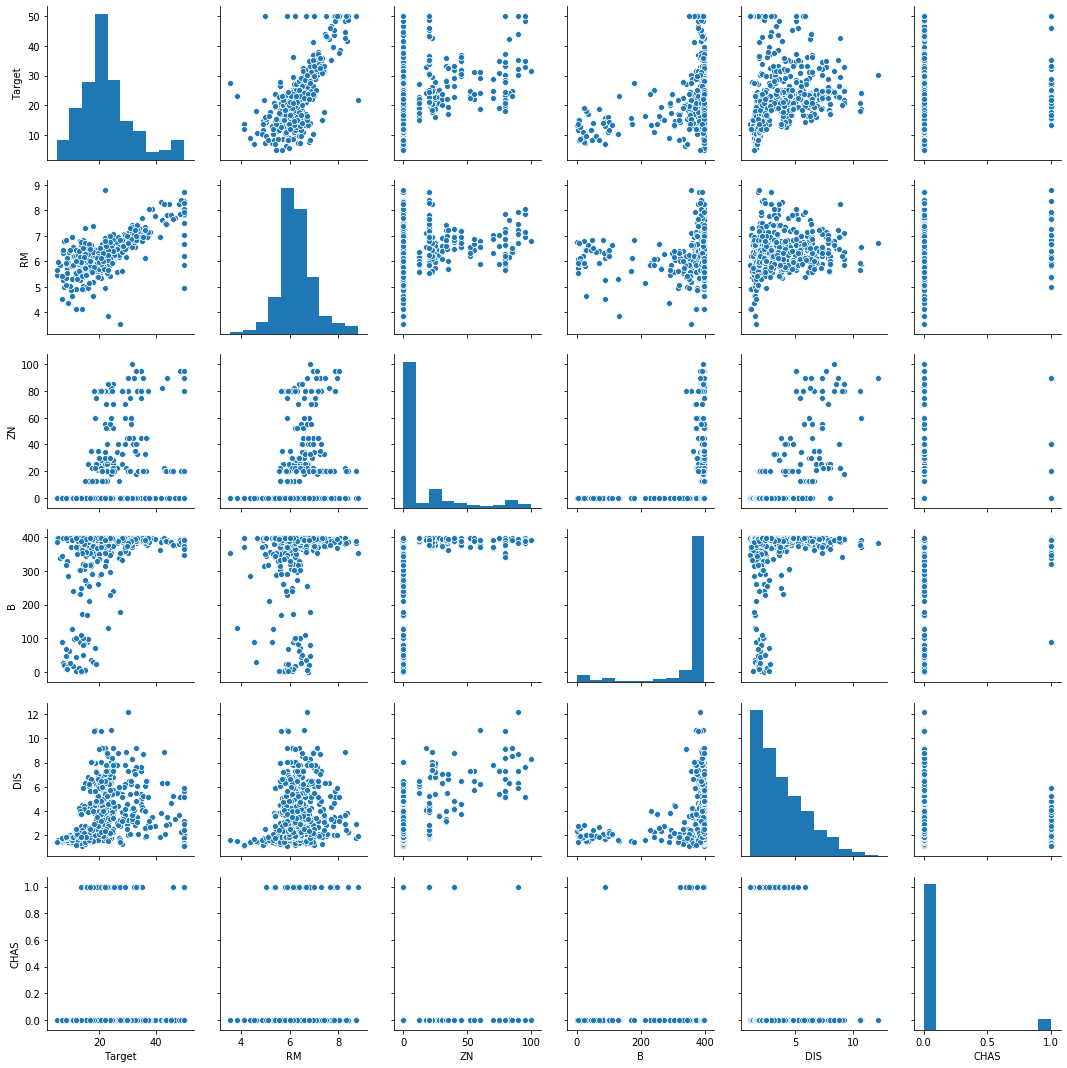

In [32]:
import seaborn as sns

sns.pairplot(df_boston, vars= ['Target','RM','ZN','B','DIS','CHAS'])